---

Nama : Badriah Nursakinah

Batch : BSD-005

Hugging Face : https://huggingface.co/spaces/nursakinahbadriah/Customer_Churn_Records

Data set : https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data, url.txt

---

## 1. Perkenalan

Problem Statement : Sebagai Data Scientiest saya akan mencoba menganalisis terkait kumpulan data nasbah BANK Internasional, dimana untuk target yang saya gunakan adalah variabel `Exited`sebagai parameter utama dalam analisis ini. Dan tujuan dari riset ini adalah untuk memahami pola dan tren yang menyebabkan kemungkinan nasabah churn (hal ini dapat ditinjau dari EDA Analysis menggunakan semua variabel dari dataset), dan adapun goal dari riset ini adalah guna memprediksi apakah ada kemungkinan akan melakuakn pemutusan jasa dari suatu bank yang dilakukan oleh nasabah.

Adapun poin-poin yang akan dianalisa dengan mengunakan metode `Explore Data Analysis` diantaranya sebagai berikut :

   - Objective Analysis 1 : Memprediksi pelanggan yang masuk group `Exited` dan `Non-Exited`
   - Objective Analysis 2 : Memprediksi jumlah pelanggan yang berada di group `Exited` atau `No Exited` berdasarkan credit score yang dimiliki (Credit Score vs Exited)(Credit Score vs Exited)
   - Objective Analysis 3 : Memprediksi negara yang memiliki pelanggan yang kemungkinan `Exited` atau `No Exited` (Geography vs Exited)
   - Objective Analysis 4 : Memprediksi pelanggan yang `Exited` berdasarkan gender (Gender vs Exited)
   - Objective Analysis 5 : Memprediksi pelanggan yang `Exited` berdasarkan usia (Age vs Exited)
   - Objective Analysis 6 : Memprediksi pelanggan yang `Exited` berdasarkan rentang waktu lamanya join (Tenrue vs Exited)
   - Objective Analysis 7 : Memprediksi jumlah saldo berdasarkan group `Exited` dan `No Exited` (Balance vs Exited)
   - Objective Analysis 8 : Memprediksi rata-rata dengan jumlah product yang dimiliki pelanggan dengan kemungkinan `Exited` dan `No Exited` (NumpProduct vs Exited)
   - Objective Analysis 9 : Memprediksi pelanggan yang memiliki kartu kredit dengan kemungkinan `Exited` (Hascard vs Exited)
   - Objective Analysis 10 : Memprediksi jumlah pelanggan yang kemungkinan `Exited` berdasarkan active atau tidaknya nasabah (Isactive vs Exited)
   - Objective Analysis 11 : Memprediksi rata-rata gaji pelanggan berdasarkan group `Exited` dan `No Exited` (Gender vs Exited)
   - Objective Analysis 12 : Memprediksi jumlah pelanggan yang komplain (Complain vs Exited)
   - Objective Analysis 13 : Memprediksi jumlah skor yang diberikan pelanggan berdasarkan group `Exited` dan `No Exited` (Statisfactionscore vs Exited)
   - Objective Analysis 14 : Memprediksi jumlah pengguna type kartu (Cardtype vs Exited)
   

   -----------------

## 2. Import Libraries

- Berikut beberapa library yang akan digunakan pada proses analisis studi kasus `Predict Costumer Churn` dengan menggunanak model `Classification` ini. 

In [1]:
# libraries
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder
import phik


#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#splitting data
from sklearn.model_selection import train_test_split

# feature scalling
from sklearn.preprocessing import MinMaxScaler

#evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

#feature sclaing
from sklearn.preprocessing import StandardScaler

# model definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from phik.report import plot_correlation_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from feature_engine.outliers import Winsorizer
from scipy.stats import mstats
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 

# Hyperparameter
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

# import kfold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay

# Model Saving

import pickle
import json


----------------

# 3.Data Loading

- Proses berikutnya saya akan melakukan Load dataset yang sudah dimiliki, dimana proses Loading ini untuk dapat menegetahui terkait `Missing Value`, `Data Duplicate` dan `Type Data`

In [2]:
# data loading
data = pd.read_csv('Customer-Churn-Records.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

- Proses pemeriksaan data ini saya lakukan untuk memastikan tidak ada nilai yang hilang dan type data semuanya benar


In [4]:
# cek info data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Dari dataset dapat dilihat informasi yang terdapat di dalam dataset yaitu : 
- RangeIndex : 1000
- Columns : 18

Selanjut nya saya akan menampilkan 10 data pertama dengan fungsi `.head()` dan 10 data terakhir dengan fungsi `.tail()`

In [5]:
# menampilkan 10 data awal
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [6]:
# menampilkan 10 data akhir
data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0,0,3,GOLD,791
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0,0,5,SILVER,560
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [7]:
# cek duplikasi data
data.duplicated().sum()

0

dari output diatas dapat dikatakan bahwa data tidak memiliki data duplicate

In [8]:
# cek missing value
data.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

dari hasil proses check missing value terdapat nilai yang hilang atau tidak lengkap dalam dataset, pemeriksaan missing value penting karena nilai yang hilang dapat mempengaruhi analisis data dan kinerja model yang dibangun

In [9]:
# Check info data 2 (statistik deskriptif)
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000




Dari data summary diatas dapat dilihat `count`,`mean`,`std`,`min`,`max` yang terdapat dalam dataset. Selanjutnya saya akan melihat informasi apa yang didapat dengan menggunakan fungsi `.info`. Dan diketahui bahwa rata - rata usia customer adalah 39 tahun dengan rata-rata credit score yang dimiliki oleh pelanggan diantara nilai 650.528 sedangkan untuk rata - rata pelanggan join di BANK tersebut itu antara 5 tahun

----

## 4. Exploratory Data Analysis (EDA)

Selanjutnya saya ingin mengeksplorasi dan membuat vizualisasi dengan `EDA Analysis` dimana untuk kolom utama yang ingin saya fokuskan untuk memulai adalah kolom prediksi `Exited`.Interpretasi kolom ini menunjukkan apakah nasabah sudah keluar dari bank atau belum.


- Objective Analysis 1 : Memprediksi pelanggan yang `Exited` atau `No Exited`

      0 = No-Exited

      1 = Exited


In [10]:
data['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

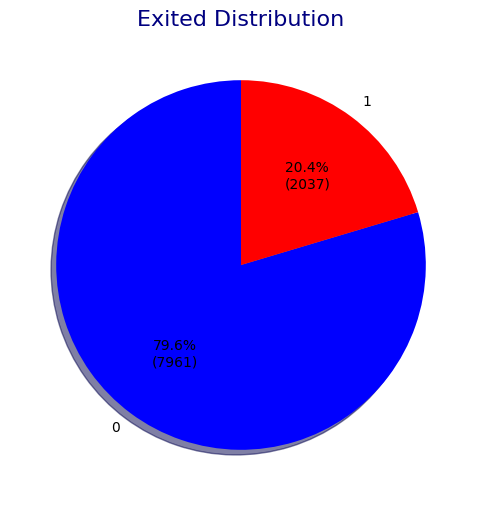

In [11]:
# Exited

ex_counts=data.Exited.value_counts()
plt.figure(figsize=(12,6))
plt.title('Exited Distribution',size=16,color='navy')


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(ex_counts,
        labels=ex_counts.index,
        autopct=lambda pct: func(pct,ex_counts),
        startangle=90,
        colors=("blue","red"),
        shadow=True);



Kesimpulan dari tren grafik `Exited`:

dapat dilihat bahwa 7961 Pelanggan berada di grup No-exited dan 2037 di grup Exited dan oleh karena itu, 79,6% pelanggan termasuk dalam kelompok No-exited

- Objective Analysis 2 : Memprediksi jumlah pelanggan yang berada di group `Exited` atau `No Exited` berdasarkan credit score yang dimiliki (Credit Score vs Exited)

In [12]:


data['CreditScore'].value_counts()



CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

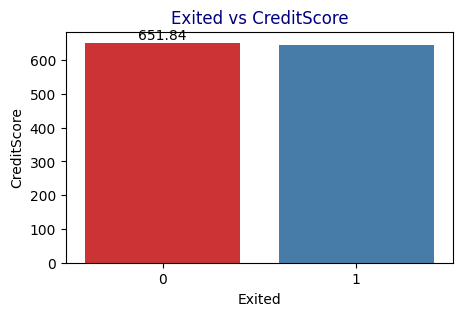

In [13]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Exited', y = 'CreditScore', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'CreditScore',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan dari tren grafif `CreditScore`

Dapat ditarik kesimpulan bahwa untuk status pelanggan dengan memiliki `CreditScore` pada dasarnya sama untuk 2 grup, dengan nilai yang sedikit lebih tinggi untuk grup No-exited(0)

- Objective Analysis 3 : Memprediksi negara yang memiliki jumlah pelanggan yang `Exited` dan `No Exited` (Geography vs Exited)

In [14]:


data['Geography'].value_counts()



Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

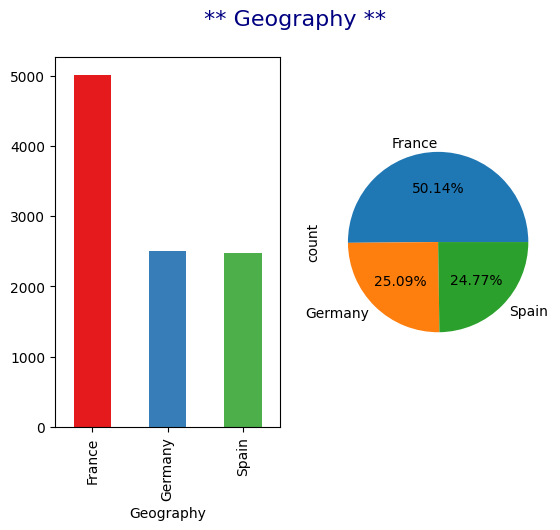

In [15]:


fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'Geography' + ' **', fontsize=16, color='navy')

plt.subplot(1, 2, 1)
data['Geography'].value_counts().plot(kind='bar', color=sns.color_palette("Set1"))

plt.subplot(1, 2, 2)
data['Geography'].value_counts().plot(kind='pie', autopct="%.2f%%")

plt.show()

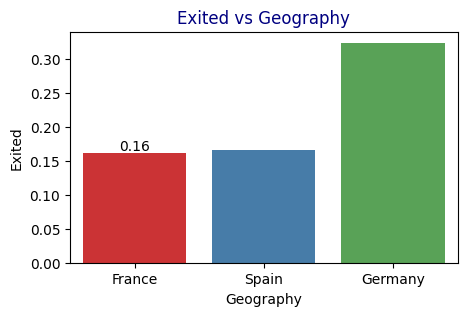

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Geography', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Geography',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan dari tren grafik `Geografi`

Dapat disimpulkan bahwa negara dengan jumlah 'Exited' tertinggi adalah Jerman, dengan rata-rata 0,32 atrtinya di Jerman 32% berasal dari kelompok 'Exited'. Dan sebaliknya, Perancis memiliki jumlah pelanggan terbesar.


- Objective Analysis 4: Memprdiksi pelanggan yang kemungkinan `Exited` berdasarkan `Gender` (Gender vs Exited)

In [17]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

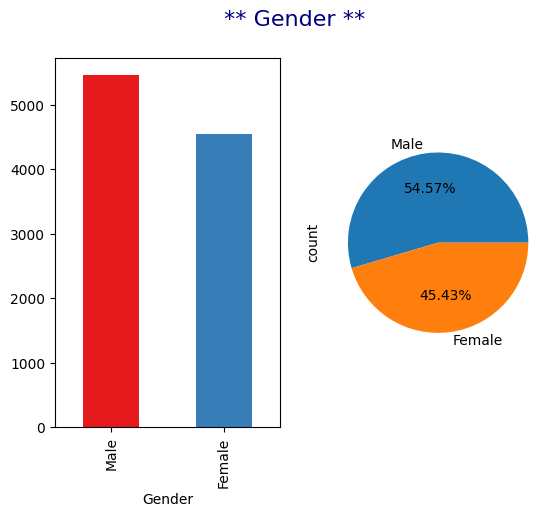

In [18]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'Gender' + ' **', fontsize=16, color='navy')

plt.subplot(1, 2, 1)
data['Gender'].value_counts().plot(kind='bar', color=sns.color_palette("Set1"))

plt.subplot(1, 2, 2)
data['Gender'].value_counts().plot(kind='pie', autopct="%.2f%%")

plt.show()

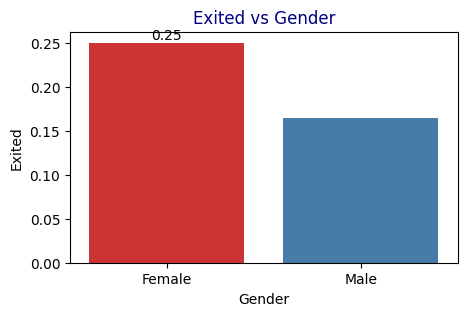

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Gender', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Gender',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan dari tren garfik `Gender`

Dapat disimpulkan bahwa `Gender` dengan jumlah 'Exited' tertinggi adalah Perempuan, dengan rata-rata 0,25. Sedangkan pelanggan terbanyak berjenis kelamin Laki-laki yaitu sebesar 54,57%.


- Objective Analysis 5 : Memprediksi pelanggan yang akan `Exited` berdasarkan usia (Age vs Exited)

In [20]:


data['Age'].value_counts()



Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

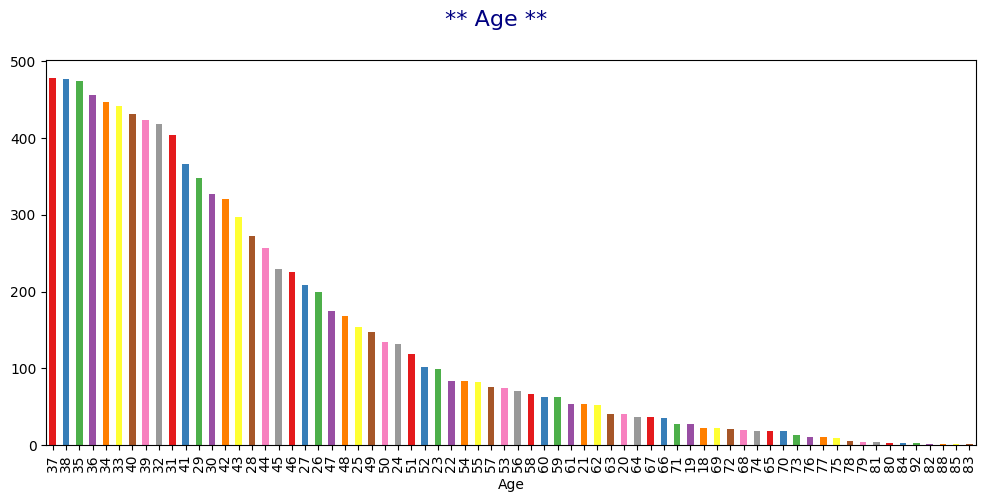

In [21]:

fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('** ' + 'Age' + ' **', fontsize=16, color='navy')

data['Age'].value_counts().plot(kind='bar', color=sns.color_palette("Set1"))

plt.show()

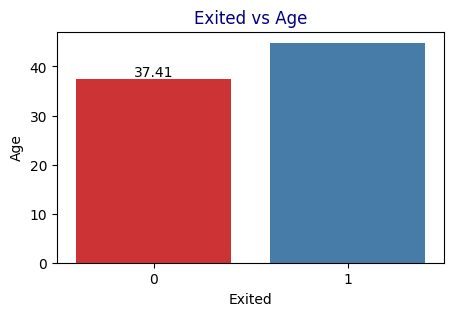

In [22]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Exited', y = 'Age', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Age',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan tren grafik `Usia`

Disimpulkan bahwa Usia dengan mean tertinggi adalah kelompok 1 (Exited), dengan rata-rata 44,84 tahun. Dengan kata lain, kelompok 'Exited' memiliki rata-rata usia yang lebih tinggi dibandingkan kelompok 'No-exited'.

- Objective Analysis 6 : Memprediksi pelanggan yang kemungkinan `Exited` berdasarkan usia (Age vs Tenrue)

In [23]:


data['Tenure'].value_counts()



Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

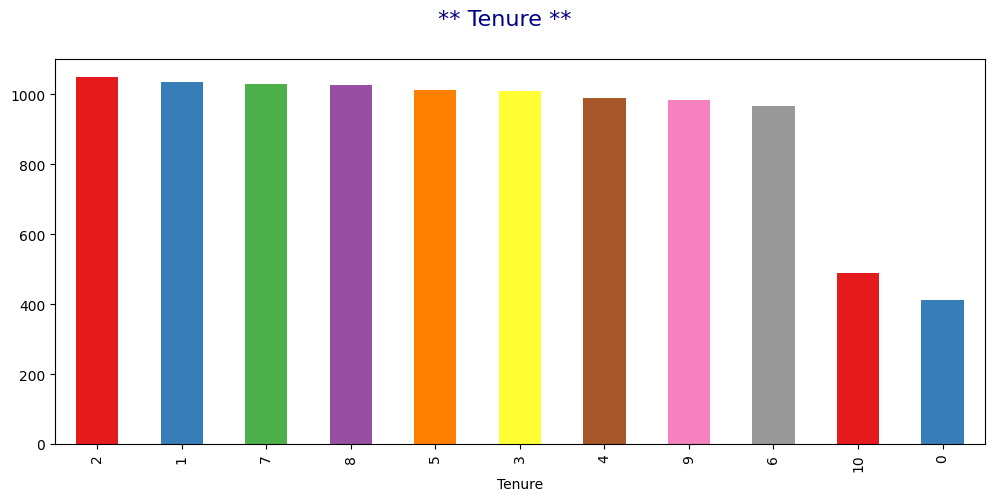

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('** ' + 'Tenure' + ' **', fontsize=16, color='navy')
data['Tenure'].value_counts().plot(kind='bar', color=sns.color_palette("Set1"))
plt.show()

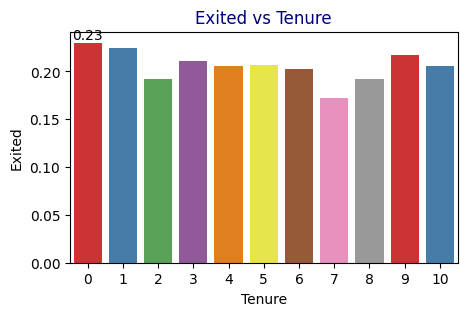

In [25]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Tenure', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Tenure',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Text(0, 0.5, 'Churn Rate')

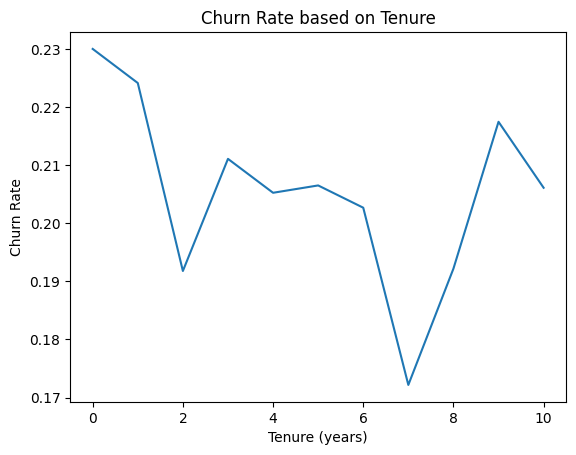

In [26]:
tenure_churn = data.groupby(['Tenure', 'Exited'])['Tenure'].size().unstack()

tenure_churn['churn_rate'] = tenure_churn[1]/tenure_churn.T.sum()

ax = tenure_churn['churn_rate'].plot(kind = 'line')
ax.set_title('Churn Rate based on Tenure')
ax.set_xlabel('Tenure (years)')
ax.set_ylabel('Churn Rate')

Kesimpulan dari tren grafik  `Tenrue`

Dapat ditarik kesimpulan bahwa `Tenure` dengan rata-rata 'Exited' tertinggi adalah Tenure = 0 dan terendah adalah Tenure = 7. Dan sebaliknya, `Tenure` 2 memiliki jumlah pelanggan tertinggi (1048) dan `Tenure` 0 memiliki jumlah pelanggan terendah (413).


- Objective Analysis 7 : Memprediksi  jumlah saldo berdasarkan group `Exited` dan `No Exited` (Balance vs Exited)

In [27]:
data['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

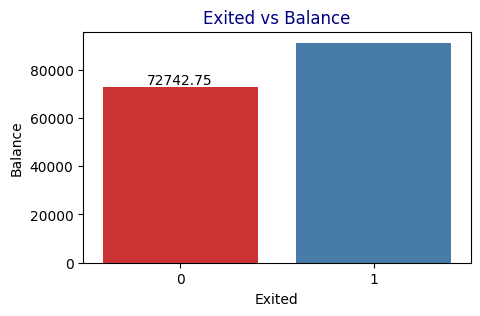

In [28]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Exited', y = 'Balance', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Balance',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan tren grafik `Saldo`

Dapat disimpulkan bahwa `Saldo` yang mempunyai mean tertinggi adalah kelompok 1 (Exited), dengan rata-rata = 91109,48.

- Objective Analysis 8 : Memprediksi rata-rata dengan jumlah numproduct yang dimiliki pelanggan dengan kemungkiannya `Exited` (NumOfProducts vs Exited)

In [29]:
data['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

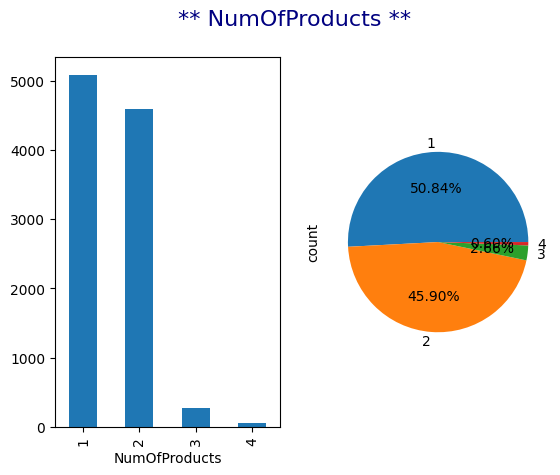

In [30]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'NumOfProducts' + ' **', fontsize=16, color='navy')

plt.subplot(1, 2, 1)
data['NumOfProducts'].value_counts().plot(kind='bar', color='C0')

plt.subplot(1, 2, 2)
data['NumOfProducts'].value_counts().plot(kind='pie', autopct="%.2f%%")

plt.show()

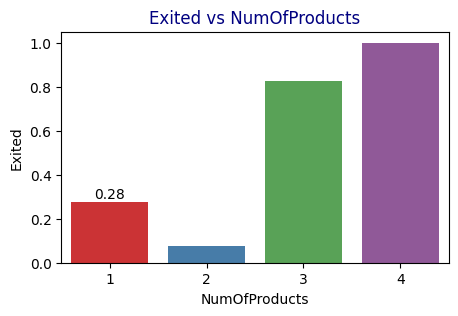

In [31]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'NumOfProducts', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'NumOfProducts',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan tren garfik untuk `NumOfProducts`

1. Kami menyimpulkan bahwa pelanggan dengan 4 dan 3 produk memiliki rata-rata Exited yang lebih tinggi, namun kami harus menekankan bahwa hanya sedikit pelanggan yang memiliki jumlah produk tersebut.

2. Pelanggan yang memiliki 2 produk merupakan pelanggan yang rata-rata Exitednya paling rendah, yaitu pelanggan yang kecenderungan Churnnya paling rendah.

3. Memperkuat bahwa jumlah pelanggan terbesar adalah pelanggan dengan 1 NumOfProducts (5084), diikuti oleh pelanggan dengan 2 NumOfProducts (4590).

- Objective Analysis 9 : Memprediksi pelanggan yang memiliki kartu kredit dengan kemungkinanya `Exited` (HasCrCard vs Exited)

In [32]:
data['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

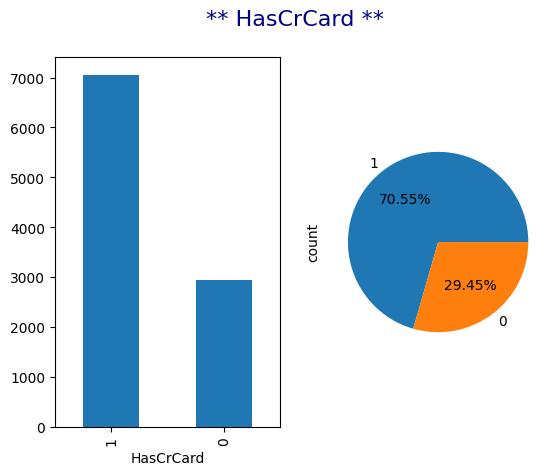

In [33]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'HasCrCard' + ' **', fontsize=16, color='navy')

plt.subplot(1, 2, 1)
data['HasCrCard'].value_counts().plot(kind='bar', color='C0')

plt.subplot(1, 2, 2)
data['HasCrCard'].value_counts().plot(kind='pie', autopct="%.2f%%")

plt.show()



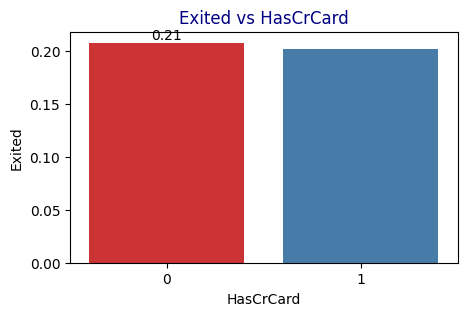

In [34]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'HasCrCard', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'HasCrCard',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan dari tren grafik `HasCrCard`

Dapat disimpulkan bahwa `HasCrCard` secara praktis sama untuk 2 grup, dengan nilai yang sedikit lebih tinggi untuk grup 0. Dan terlihat juga `HasCrCard` = 1 memiliki pelanggan terbanyak (7055) atau 70,55%.

- Objective Analysis 10 : Memprediksi jumlah pelanggan yang kemungkinan `Exited` berdasarkan active atau tidaknya (IsActiveMember vs Exited)

In [35]:
data['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

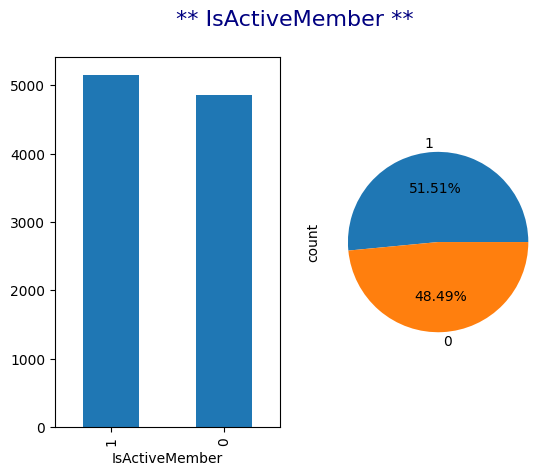

In [36]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'IsActiveMember' + ' **', fontsize=16, color='navy')

plt.subplot(1, 2, 1)
data['IsActiveMember'].value_counts().plot(kind='bar', color='C0')

plt.subplot(1, 2, 2)
data['IsActiveMember'].value_counts().plot(kind='pie', autopct="%.2f%%")

plt.show()

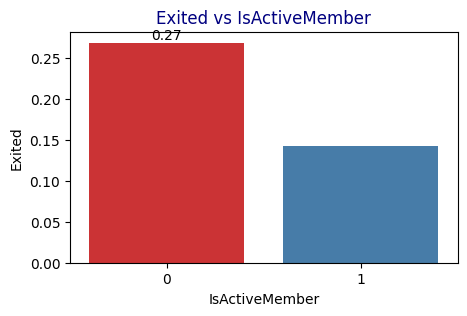

In [37]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'IsActiveMember', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'IsActiveMember',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan tren grafik untuk `IsActiveMember`

 Dapat disimpulkan bahwa IsActiveMember dengan mean 'Exited' tertinggi adalah grup 0 (No-Exited), dengan rata-rata = 0,27.

- Objective Analysis 11 : Memprediksi rata-rata gaji pelanggan berdasarkan group `Exited` dan `No Exited` (EstimatedSalary vs Exited)

In [38]:
data['EstimatedSalary'].value_counts()

EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

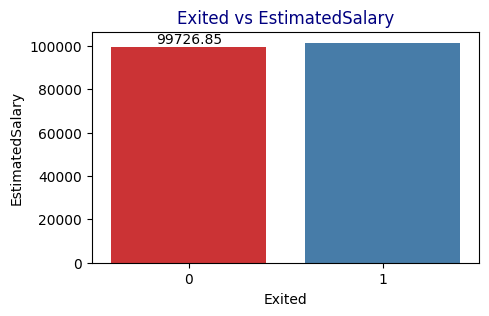

In [39]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Exited', y = 'EstimatedSalary', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'EstimatedSalary',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan dari tren grafik untuk `Perkiraan Gaji`

Dapat diprediksi bahwa perkiraan Gaji pada dasarnya sama untuk 2 kelompok, dengan nilai yang sedikit lebih tinggi untuk kelompok 1 (Keluar).

- Objective Analysis 12 : Memprediksi jumlah pelanggan yang komplain (Complain vs Exited)

In [40]:
data['Complain'].value_counts()

Complain
0    7956
1    2044
Name: count, dtype: int64

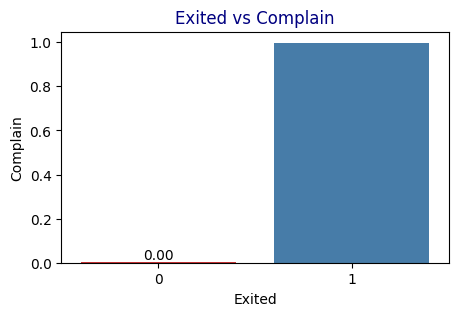

In [41]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Exited', y = 'Complain', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Complain',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan dari tren grafik `Complain`

Kita dapat memprediksi bahwa 'Keluar' dan 'Mengeluh' mempunyai korelasi sebesar 100% atau mendekatinya. Namun jika ditinjau dari rata-rata yang komplain untuk group 0 = 7956 dan group 1 = 2044

- Objective Analysis 13 : Memprediksi jumlah skor yang diberikan pelanggan berdasarkan group `Exited` dan `No Exited` (Satisfaction Score vs Exited)

In [42]:
data['Satisfaction Score'].value_counts()

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

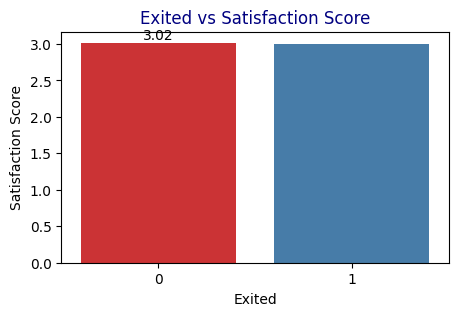

In [43]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Exited', y = 'Satisfaction Score', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Satisfaction Score',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

Kesimpulan tren grafik untuk `Satisfaction Score`

Dapat disimpulkan bahwa Skor Kepuasan pada dasarnya sama untuk kedua grup, dengan nilai yang sedikit lebih tinggi untuk grup No-exited (0).

- Objective Analysis 14 : Memprediksi jumlah type kartu yang digunakan oleh pelanggan (Card Type vs Exited)

In [44]:
data['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

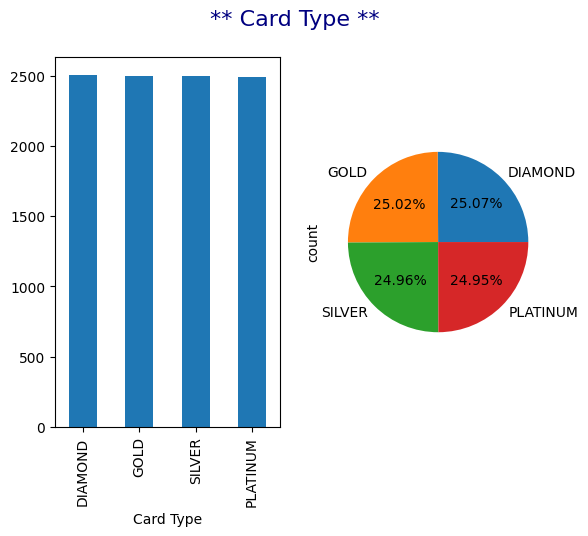

In [45]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'Card Type' + ' **', fontsize=16, color='navy')

plt.subplot(1, 2, 1)
data['Card Type'].value_counts().plot(kind='bar', color='C0')

plt.subplot(1, 2, 2)
data['Card Type'].value_counts().plot(kind='pie', autopct="%.2f%%")

plt.show()

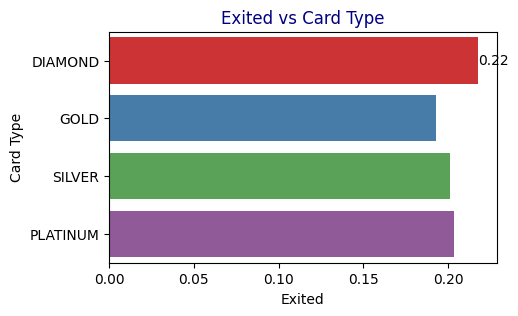

In [46]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=data, x = 'Exited', y = 'Card Type', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Card Type',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()


Kesimpulan tren grafik untuk 'Card Type'

Dari tren grafik diatas dapat simpulkan bahwa keempat jenis kartu tersebut mempunyai jumlah yang hampir sama.

------------------

## 5. Feature Engineering

Karena saya akan melakukan model `Classification` pada dataset, maka data akan dibagi menjadi feature X dan label/target y. Lalu kedua dataset tersebut juga akan dibagi menjadi train-set dan test-set. Sebelum split data, maka langkah awal saya  akan membuat variable baru `data_inf` yang bertujuan untuk train data inference sehingga tidak perlu untuk menginput secara manual di inference dan tujuan dari proses ini adalah untuk mengubah atau membuat fitur-fitur baru yang lebih informatif atau lebih sesuai dengan masalah yang ingin diselesaikan.

In [47]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = data.sample(1, random_state=0)

# menghapus data inference dari df
data.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

#simpan ke csv
data_inf.to_csv('data_inf')

### **Model Missing Value**

Proses ini memiliki cara kerja untuk menangani nilai yang hilang (missing value) yang ada di dalamnya. Dimana proses missing value ini lebih bertujuan untuk mencegah bias dalam proses analisis selanjutnya.

In [48]:
# Cek data yang kolomnya memiliki nilai
data.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### **Split Feature `X` dan Target `y`**

 Proses ini yaitu melakukan pemisahan antara label dengan fitur dimana secara keseluruhan, pemisahan fitur (X) dan variabel target (y) merupakan langkah penting dalam machine learning sehingga dapat menggeneralisasi dengan baik terhadap contoh-contoh yang tidak terlihat. 

In [49]:
#Splitting dataset X (feature) dan y (target)

X = data.drop(['Exited'], axis = 1)
y = data['Exited']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify=y,
                                                    random_state=42)

Setelah proses Split Feature `X` dan Target `y`telah dilakukan maka proses selanjutnya yaitu saya akan melakukan proses split numerical dan categorical kolom, dimana tujuan darai proses inin adalah Adapun tujuan dari proses Split Numerical Columns and Categorical Columns pada data adalah untuk memisahkan variabel numerik (numerical) dan variabel kategorikal (categorical) dalam dataset.

### **Split Numerical Columns and Categorical Columns**

Di proses ini saya akan split `Numerical Columns and Categorical Columns` pada data adalah untuk memisahkan variabel numerik (numerical) dan variabel kategorikal (categorical) dalam dataset. 

In [51]:
# proses melakukan split kolom numerik dan kategori
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(exclude='object').columns.tolist()

In [52]:
# cek total unik data
X_train[num_cols].nunique()

RowNumber             7999
CustomerId            7999
CreditScore            457
Age                     69
Tenure                  11
Balance               5109
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       7998
Complain                 2
Satisfaction Score       5
Point Earned           784
dtype: int64

In [53]:
numerical = []
categorical_num = []
for i in num_cols:
    if X_train[i].nunique()>11:
        numerical.append(i)
    else:
        categorical_num.append(i)
print(numerical)
print(categorical_num)

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']
['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']


In [54]:
# memanggil data kategorikal
X_train[categorical_num]

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Complain,Satisfaction Score
4791,2,2,1,0,0,2
9661,3,2,1,1,0,2
3519,5,1,1,0,1,1
4473,4,1,1,0,0,1
854,8,2,0,1,0,3
...,...,...,...,...,...,...
4239,3,1,1,0,0,3
4486,3,1,1,0,0,4
541,9,2,1,1,0,3
8505,5,1,0,0,0,4


Hasil output diatas menampilkan semua data yang memiliki kondisi katgorikal

In [55]:
# memisahkan data nominal dan ordinal
nominal = ['Tenure','NumOfProducts','Complain']
ordinal =['HasCrCard','IsActiveMember', 'Satisfaction Score']

Dengan memisahkan data nominal dan ordinal, maka saya dapat menerapkan metode atau teknik analisis yang sesuai untuk setiap jenis data, karena karakteristik dan sifat data nominal dan ordinal berbeda. Setelah dilakukan proses split numerikal dan kategorikal maka langkah berikutnya saya akan melakukan proses handling outlier.

### **Handling Outlier**

Proses handling outlier pada `Feature Engineer` ini saya memilih proses `capping skew Winsorizer` dikarenakan jumlah `outlier` tidak banyak untuk handling. 

- Cek data outlier dengan menggunakan fungsi `.skew()`

In [56]:
X_train[nominal].skew()

Tenure           0.017194
NumOfProducts    0.765363
Complain         1.464408
dtype: float64

In [57]:
X_train[ordinal].skew()

HasCrCard            -0.914237
IsActiveMember       -0.070315
Satisfaction Score   -0.011623
dtype: float64

In [58]:
# penampungan data
skew = []
not_skew =[]

#membuat kondisi pengecekan skew data.
for i in numerical:
    if X_train[i].skew() > -0.5 and X_train[i].skew() < 0.5:
        not_skew.append(i)
    else:
        skew.append(i)
print('skew',skew)
print('not skew',not_skew)

skew ['Age']
not skew ['RowNumber', 'CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']


In [59]:
# Proses capping skewed
winsoriser_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,# memilih nilai 1,5 karena skew tidak extreme 
                             variables=skew)

Tujuan dengan menggunakan ` capping skew` dilakukan untuk mengurangi pengaruh outlier dan mengatasi masalah distribusi data yang tidak simetris.

In [60]:
X_train_cap = winsoriser_skewed.fit_transform(X_train)
X_test_cap = winsoriser_skewed.fit_transform(X_test)

- Menampilkan data dari kolom yang dipilih

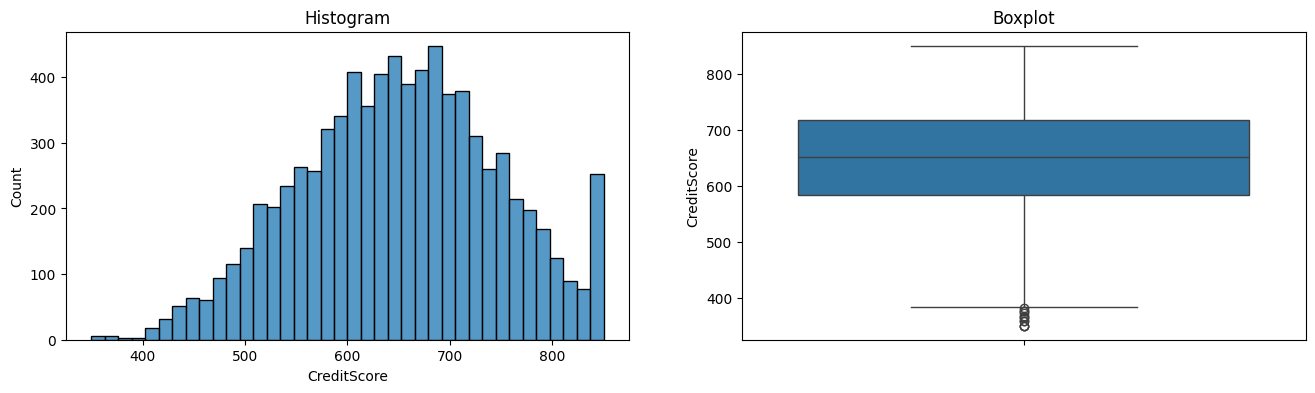

In [61]:
# Mengatur ukuran histogram dan boxplot
plt.figure(figsize=(16, 4))
# Membuat Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['CreditScore'])
plt.title('Histogram')
# Membuat Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(X_train['CreditScore'])
plt.title('Boxplot')
plt.show()

Setelah di cek rupanya data termasuk dalam golongan normal distribution. Kemudian saya akan menentukan upper dan lower boundary nya.

In [62]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [63]:
# Calculate boundaries for `Age` in the titanic
upper_boundary_age, lower_boundary_Age = find_normal_boundaries(X_train, 'Age')
upper_boundary_age, lower_boundary_Age	

(70.63839765845606, 7.212583714215526)

Hasil output diatas menunujukkan bahwa untuk usia maksimum dalam kelompok atau kategori tersebut adalah sekitar 70.64 tahun dan usia minimum dalam kelompok atau kategori tersebut adalah sekitar 7.21 tahun

### **Feature Selection**

Langkah awal dalam proses `Feature Selectio`n saya akan melakukan pengecekan korelasi menggunakan `phik`

In [64]:
#menghitung correlation menggunakan phi
combined_train_data = pd.concat([X_train,y_train],axis=1)
phik_overview = combined_train_data.phik_matrix()
phik_overview['Exited']

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned', 'Exited']


RowNumber             0.000000
CustomerId            0.035784
Surname               0.000000
CreditScore           0.113416
Geography             0.109348
Gender                0.163334
Age                   0.483884
Tenure                0.026429
Balance               0.180051
NumOfProducts         0.561288
HasCrCard             0.019207
IsActiveMember        0.230564
EstimatedSalary       0.000000
Complain              0.999974
Satisfaction Score    0.000000
Card Type             0.028366
Point Earned          0.003376
Exited                1.000000
Name: Exited, dtype: float64

Setelah itu, kemudian saya akan menggambil korelasi diatas   `0,1` dengan target `Exited`

In [65]:
# menggambil korelasi
phik_overview['Exited']
features =[]
for i in X_train.columns.tolist():
    if phik_overview['Exited'][i]> 0.1:
        features.append(i)
features

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'Complain']

Setelah proses pengambilan korelasi selesai kemudian saya akan memisahkan numerik dan kategorikal

In [66]:
features = ['CreditScore','Age','Balance','NumOfProducts','IsActiveMember','Complain']

In [67]:
num_cols =['CreditScore','Age','Balance']

cat_ord = ['NumOfProducts','IsActiveMember','Complain']

Langkah berikutnya saya akan membuat variabel baru dengan fitur baru berdasarkan pengambilan korelasi.

In [68]:
# membuat variable untuk pengujian
X_train_features = X_train_cap[features]
X_test_features = X_test_cap[features]

In [69]:
X_train_num = X_train_features

In [70]:
# cek data baru
X_train_features

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Complain
4791,709,35,0.00,2,0,0
9661,748,39,0.00,2,1,0
3519,661,41,28082.95,1,0,1
4473,646,29,105957.44,1,0,0
854,675,57,0.00,2,1,0
...,...,...,...,...,...,...
4239,636,39,118336.14,1,0,0
4486,528,35,156687.10,1,0,0
541,622,26,0.00,2,1,0
8505,592,28,137222.77,1,0,0


In [71]:
X_train_cap = X_train
X_test_cap = X_test

### **Model Pipeline**

Proses berikutnya yaitu saya akan  menggunkan model Pipline dimana model pipline ini berfungis dalam penggabungan untuk proses`encoding` dan proses `scaling`. proses encoding dan scaling dengan menggunakan model `Pipline` feature engineering dapat mencegah terjadinya kebocoran informasi (data leakage).

In [72]:
# membuat scaler
scaler = StandardScaler()

In [73]:
# transform berdasarkan scallar
preprocessor = ColumnTransformer([('scaling',scaler,num_cols)],remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', StandardScaler(),
                                 ['CreditScore', 'Age', 'Balance'])])

In [74]:
# proses transformasi
X_train_final = preprocessor.fit_transform(X_train_features)
X_train_final_data = pd.DataFrame(X_train_final, columns= list(preprocessor.get_feature_names_out()))
X_train_final_data

,scaling__CreditScore,scaling__Age,scaling__Balance,remainder__NumOfProducts,remainder__IsActiveMember,remainder__Complain
0,0.602711,-0.372844,-1.226021,2.0,0.0,0.0
1,1.006246,0.036037,-1.226021,2.0,1.0,0.0
2,0.106052,0.240478,-0.775401,1.0,0.0,1.0
3,-0.049153,-0.986166,0.474177,1.0,0.0,0.0
4,0.250911,1.876003,-1.226021,2.0,1.0,0.0
...,...,...,...,...,...,...
7994,-0.152624,0.036037,0.672806,1.0,0.0,0.0
7995,-1.270106,-0.372844,1.288187,1.0,0.0,0.0
7996,-0.297483,-1.292827,-1.226021,2.0,1.0,0.0
7997,-0.607894,-1.088387,0.975861,1.0,0.0,0.0


------

## 6. Model Definition 

Pada bagian `Model Definition`  saya akan menggunakan beberapa model yang diantaranya `SVM`, `KNN`, `Decision Tree`, `Random Forest`, dan `Naive Bayes`

In [75]:
svm_pipe = Pipeline([('preprocessing', preprocessor), 
                        ('SVM', SVC())])

knn_pipe = Pipeline([('preprocessing', preprocessor), 
                        ('KNN', KNeighborsClassifier())])

dt_pipe = Pipeline([('preprocessing', preprocessor), 
                        ('DT', DecisionTreeClassifier())])

rf_pipe = Pipeline([('preprocessing', preprocessor), 
                        ('RF', RandomForestClassifier())])

nb_pipe = Pipeline([('preprocessing', preprocessor), 
                        ('NB', GaussianNB())])

------

## 7. Model Training

### **Cross Validation**

Pada model `cross validation`saya akan melakukan pengecekan silang dengan menggunakan data baru sebagai model yang sudah dibuat. Adapun tujuan dari melakukan pengecekan silang (cross-validation) dengan menggunakan data baru pada model yang sudah dibuat adalah untuk menguji kinerja model secara objektif dan mengukur sejauh mana model dapat menggeneralisasi pada data yang belum pernah dilihat sebelumnya. Dengan menggunakan data baru sebagai pengujian, saya mendapatkan perkiraan yang lebih akurat tentang kinerja model dan memvalidasi apakah model yang telah dilatih mampu mengklasifikasikan data yang tidak digunakan selama pelatihan 

In [76]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each pipeline
cv_svm = cross_val_score(svm_pipe, X_train_features, y_train, cv=5, scoring='f1')
cv_knn = cross_val_score(knn_pipe, X_train_features, y_train, cv=5, scoring='f1')
cv_dt = cross_val_score(dt_pipe, X_train_features, y_train, cv=5, scoring='f1')
cv_rf = cross_val_score(rf_pipe, X_train_features, y_train, cv=5, scoring='f1')
cv_nb = cross_val_score(nb_pipe, X_train_features, y_train, cv=5, scoring='f1')

In [77]:
# finding best model based on cross val score (mean) with for looping

name_model = []
cv_scores = 0

for cv,name in zip([cv_svm,cv_knn,cv_dt,cv_rf,cv_nb], 
                   ['SVM_model', 'KNN_model','DT_model','RF_model','NB_model']) : 
    print(name)
    print(f'f1score - All - Cross Validataion : {cv}')
    print(f'f1score - mean - Cross Validataion : {cv.mean()}')
    print(f'f1score - std - Cross Validataion : {cv.std()}')
    print(f'f1score - Range of Test Set : {cv.mean()-cv.std()}-{cv.mean()+cv.std()}')
    print('-' * 80)

    if cv.mean() > cv_scores :
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print(f'Best Model : {name_model}')
print(f'Cross validation mean from best model : {cv_scores}')

SVM_model
f1score - All - Cross Validataion : [0.99539171 0.9969419  0.9969419  0.99846861 0.99541985]
f1score - mean - Cross Validataion : 0.9966327901756303
f1score - std - Cross Validataion : 0.001146545836047944
f1score - Range of Test Set : 0.9954862443395824-0.9977793360116782
--------------------------------------------------------------------------------
KNN_model
f1score - All - Cross Validataion : [0.9876161  0.99386503 0.99540582 0.99229584 0.99234303]
f1score - mean - Cross Validataion : 0.9923051641908689
f1score - std - Cross Validataion : 0.0026090648957305357
f1score - Range of Test Set : 0.9896960992951384-0.9949142290865994
--------------------------------------------------------------------------------
DT_model
f1score - All - Cross Validataion : [0.99229584 0.9969419  0.99234303 0.99539171 0.99390244]
f1score - mean - Cross Validataion : 0.9941749824061423
f1score - std - Cross Validataion : 0.0017943089879364632
f1score - Range of Test Set : 0.9923806734182059-0.99

Dapat disimpulkan dari hasil output diatas berdasarkan nilai `mean` yang tertinggi pada nilai F1 Score bahwa `model terbaik : SVM_model`
dengan nilai rata-rata validasi silang dari model terbaik : 0.9966327901756303

### **Proses Looping Data**

Pada bagian ini proses yang umumnya dilakukan dalam cross-validation untuk membandingkan kinerja beberapa model yang berbeda dan menentukan model mana yang paling baik untuk data yang saya miliki. Dimana tujuan utama dari proses ini adalah untuk memilih model yang dapat memberikan hasil yang lebih baik dalam memprediksi atau mengklasifikasikan data yang tidak terlihat sebelumnya

In [78]:
svm_pipe.fit(X_train_features,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance'])])),
                ('SVM', SVC())])

In [79]:
# Melakukan prediksi sebelum di tunning
y_pred_train = svm_pipe.predict(X_train_features)
y_pred_test = svm_pipe.predict(X_test_features)

In [80]:
#cek hasil model 
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6369
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      7999
   macro avg       1.00      1.00      1.00      7999
weighted avg       1.00      1.00      1.00      7999
 



Sebelum di tuning di dapat data sebagi berikut : 
 - f1-score (0): 1.00
 - f1-score (1):0.99
 - accuracy : 1.00
 
dengan hasil diatas didapat bahwa hasil default (0) lebih tinggi dari pada default (1). selanjutnya saya akan melakukan tuning.

## **hyperparameter tuning**

Setelah melakukan proses `Looping Data`, kemudian saya akan melakukan hyperparameter tuning. Pada proses `hyperparameter tuning` untuk mengetahui nilai F-1 score baik sebelum di tuning maupun setelah dituning


In [81]:
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - F1' : f1_score(y_train, y_pred_train),
      'test - F1' : f1_score(y_test, y_pred_test)
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - F1,0.996633
test - F1,0.996319


Dari hasil otput diatas menunjukkan bahwa untuk score train F-1 adalah 0.996633 dan score test F-1 adalah 0.996319

In [82]:
# Define parameter grid
param_grid = {'SVM__C': [0.001, 0.01, 0.1, 1, 10, 500],# nilai parameter 'gamma' yang optimal
              'SVM__gamma': [0.001, 0.01, 0.1, 1, 10, 500]}#nilai  parameter 'C' yang optimal (auto untuk meningkatkan nilai hasil setelah tuning)

# Initialize GridSearchCV with SVM classifier and parameter grid
svm_grid = GridSearchCV(estimator=svm_pipe, param_grid=param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to the training data
svm_grid.fit(X_train_features, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Balance'])])),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [0.001, 0.01, 0.1, 1, 10, 500],
                         'SVM__gamma': [0.001, 0.01, 0.1, 1, 10, 500]},
             scoring='f1')

In [83]:
# Akses model terbaik yang ditemukan
best_svm = svm_grid.best_estimator_

In [84]:
best_svm

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance'])])),
                ('SVM', SVC(C=0.1, gamma=0.01))])

Croscheck untuk best parameter yang akan digunakan

------

## 8. Model Evaluation

Proses `Model Evaluation` pada bagian ini yaitu untuk mengetahui nilai `Prediksi F1score Sebelum Tuning` dengan `Prediksi F1score Setelah Tuning` dari data yang telah diolah, dan dari hasil nilai inilah maka dapat disimpulkan apakah data ini masih dikatakan `Goodfitting`, `Overfitting` atau `Underfitting`

In [85]:
# Melakukan prediksi pada data uji menggunakan model terbaik
y_pred_train_best = best_svm.predict(X_train_features)
y_pred_test_best = best_svm.predict(X_test_features)


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6369
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      7999
   macro avg       1.00      1.00      1.00      7999
weighted avg       1.00      1.00      1.00      7999
 

Confusion Matrix      : 


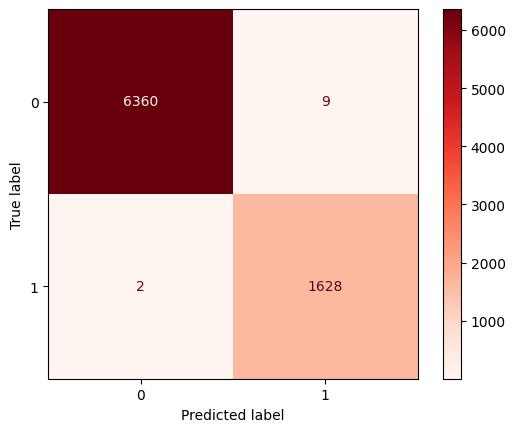

In [86]:
print('Classification Report : \n', classification_report(y_train, y_pred_train_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_svm, X_train_features, y_train, cmap='Reds'))

Untuk hasil output dari nilai `Classification Report` dapat disimpulkan bahwa bahwa model memiliki akurasi keseluruhan sebesar 100%, yang menunjukkan bahwa sebagian besar prediksi yang dilakukan oleh model adalah benar.



Dan Untuk hasil output `Matrix Accuray` dapat diismpulkan bahwa : 

- pada kolom yang bernilai angka 1628 memiliki pengertian `True Positif` artinya jumlah data yang secara benar diprediksi sebagai positif oleh model
- pada kolom yang bernilai 6360 artinya `True Negatif` artinya jumlah data yang secara benar diprediksi sebagai negatif oleh model
- Pada kolom yang bernilai 9 artinya `False Posiitif` artinya jumlah data yang salah diprediksi sebagai positif oleh model
- Pada kolom yang bernilai 2 adalah `False Negatif` artinya jumlah data yang salah diprediksi sebagai negatif oleh model

### **Analisa Hasil Prediksi Train**

Adapun tujuan dari analisis hasil prediksi train adalah untuk memahami kinerja model pada data pelatihan. Analisis ini membantu dalam evaluasi dan pemahaman tentang bagaimana model ini dapat mempelajari pola-pola dalam data pelatihan dan sejauh mana model dapat menggeneralisasi pada data yang telah dilihat sebelumnya

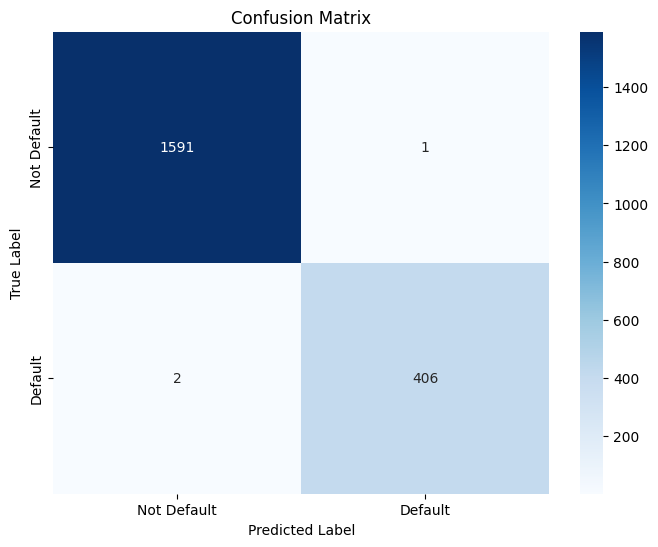

In [87]:
# Melakukan prediksi pada data uji
y_pred_test = best_svm.predict(X_test_features)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Pada proses ini jika ditinjau dari hasil diatas maka saya akan membandingkan hasil sebelum dan sesudah di tuning, berikut cara dalam melakukan prediksi pada data uji menggunakan model `SVM` untuk menampilkan hasil nilai sebelum tuning dan setelah tuning

In [88]:
# Melakukan prediksi pada data uji menggunakan model SVM sebelum tuning
y_pred_test_before_tuning = svm_pipe.predict(X_test_features)

# Melakukan prediksi pada data uji menggunakan model terbaik setelah tuning
y_pred_test_after_tuning = best_svm.predict(X_test_features)

# Laporan klasifikasi sebelum penyetelan (tuning) model
print("Classification Report Sebelum Penyetelan (Tuning) Model:")
print(classification_report(y_test, y_pred_test_before_tuning))

# Laporan klasifikasi setelah penyetelan (tuning) model
print("\nClassification Report Setelah Penyetelan (Tuning) Model:")
print(classification_report(y_test, y_pred_test_after_tuning))


Classification Report Sebelum Penyetelan (Tuning) Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Classification Report Setelah Penyetelan (Tuning) Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Dari hasil output diatas dapat ditarik kesimpulan bahwa Data tergolong `Good Fitting`


- Setelah penyetelan (tuning) model, terjadi sedikit perbaikan dalam kinerja model pada kelas 1, dengan peningkatan dalam score precision
- Hasil ini membuktikan bahwa untuk kelas 1 dan kelas 0 memiliki kinerja yang sama-sama baik
- Perlu dilakukan explore lebih lanjut untuk bisa memberikan peluang best model selain SVM


----

## 9. Model Saving

Pada bagian `Model Saving` ini merupakan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model, diaman hasil `Model Saving` ini akan digunakan pada proses `Model Inference`


In [89]:
#Save the files
with open('best_svm_model.pkl', 'wb') as file_1:
  pickle.dump(best_svm, file_1)


-----

## 10. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Gunakan model terbaik berdasarkan hasil `Model Evaluation`. Hasil ini ada pada `Notebook` yang berbeda

### **Conceptual Problem**

1. Bagging 

   Latar belakang adanya metode Bagging (Bootstrap Aggregating) adalah untuk meningkatkan kinerja model pembelajaran ensemble dengan menggabungkan prediksi dari beberapa model yang dilatih pada sampel data yang diambil secara acak dengan penggantian. Metode Bagging dikembangkan sebagai solusi untuk mengatasi masalah overfitting dan mengurangi varian (variance) dalam model pembelajaran.

    Cara kerja Bagging adalah sebagai berikut:
    - Pembuatan bootstrap sample: Bagging menggunakan teknik bootstrap untuk membuat sampel data yang diambil secara acak dengan penggantian dari set pelatihan asli.
    - Pelatihan model ensemble: Setelah bootstrap sample dibuat, model yang sama atau model yang serupa (misalnya, model pohon keputusan) dilatih pada setiap bootstrap sample.
    - Penggabungan prediksi: Setelah semua model dalam ensemble dilatih, prediksi dari setiap model diambil secara individu.
    - Penggabungan prediksi ensemble: Prediksi dari setiap model dalam ensemble digabungkan atau diagregasi untuk menghasilkan prediksi akhir ensemble.

2. Cara kerja Algoritma SVM dengan Algoritma Boosting

    Perbedaan utama antara SVM dan algoritma boosting adalah dalam pendekatan pembelajaran dan tujuan utama dari masing-masing algoritma:

    - SVM berfokus pada pemisahan kelas yang optimal dengan mencari hyperplane yang memiliki margin maksimum antara kelas.
    - Boosting berfokus pada membangun serangkaian model lemah secara berurutan untuk mengoreksi kesalahan prediksi model sebelumnya dengan memberikan bobot lebih pada  sampel yang terklasifikasi dengan salah.

     Algoritm SVM :
    - untuk pemisahan kelas dan juga dapat digunakan untuk regresi
    - mencari hyperplane optimal yang memaksimalkan margin antara dua kelas yang berbeda dalam data pelatihan.
    - mencapai pemisahan optimal dan memiliki toleransi terhadap outlier dalam data.

    Algoritma Boosting :
    - Membuat beberapa model secara berurutan 
    - setiap model berfokus pada sample data yang salah diklasifikasikan
    - setiap model baru menambah bobot pada sample yang sulit diprediksi
    - prediksi akhir dihasilkan dengan menggabung prediksi dari semua model 

3. Cross Validation : 

    Cross-validation (validasi silang) adalah metode evaluasi yang digunakan untuk mengukur kinerja dan kemampuan generalisasi dari suatu model pembelajaran dengan membagi data menjadi subset pelatihan dan subset pengujian secara berulang-ulang

    Keuntungan dari cross-validation adalah sebagai berikut:

    - menghindari overfitting
    - meningkatkan estimasi kinerja
    - memaksimalkan penggunaan data



    -------

## 11. Pengambilan Kesimpulan

### **Model Analysis**

Setelah dilakukan rangkain proses penyelesaian mulai dari `Load Data`,`Exploratory Data Analysis`, `Feature Engineer`,`Model Definition`, `Model Training`, hingga akhir proses yaitu `Model Evaluation` pada bagian ini akan dijelaskan mengenai pengambilan keputusan terumtama pada metode serta model yang digunakan gune mendukung dalam proses pengolahan data . Adapun kesimpulan yang dapat di intrepretasikan sebagai berikut:

1. Model Analysis

   Berdasarkan nilai F-1Score yang didapat tentang performa model dari hasil model yang saya dapat yaitu : 

   Sebelum penyetelan tuning :
      - f1-score (0): 1.00
      - f1-score (1): 1.00
      - Akurasi: 1.00

   Setelah penyetelan tuning:
      - f1-score (0): 1.00
      - f1-score (1): 1.00
      - Akurasi: 1.00

   Dari hasil diatas dapat dilihat bahwa f1-score untuk kedua kelas (0 dan 1) memiliki sifat data yang `good fitting`, ini bisa dianggap bahwa hasil model yang saya gunakan telah berhasil. Keberhasilan model yang saya gunakan dengan di validasi hasil F-1 score antara sebelum dan sesudah penyetelan tuning yang memiliki nilai yang stabil dengan pencapaian score 1.00 (100%) hal ini dipengaruhi pada saat proses `Feture selection` dimana pada proses ini saya menggunakan variabel (kolom) yang nilai korelasinya hampir mendekati 100% dengan varibael targetnya. Artinya penentuan variabel (kolom) pada proses `Feature Selection` sangat mempengaruhi keberhasilan pada model yang digunakan. Dan ketika saya menggunakan variabel yang nilai korelasinya jauh dari target maka penentuan model yang diginakan juga akan berubah dan hasil F-1 score nya pun berubah (hal ini sudah saya buktikan pada proses pengerjaan di notebook lain)


2. Kelebihan & Kelemahan

   Kelebihan Model Classification :

      - Kemampuan prediktif : Model klasifikasi dapat melakukan prediksi atau klasifikasi pada data yang belum terlihat sebelumnya
      - Interpretabilitas: Beberapa model klasifikasi seperti SVM, Naive Bayes atau Decision Tree, mudah diinterpretasikan dan memberikan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi prediks
      - Pengambilan keputusan: Model klasifikasi dapat digunakan sebagai alat dalam pengambilan keputusan, di mana hasil prediksi dapat membantu dalam menentukan tindakan atau strategi yang tepat.
      - Scalability: Model klasifikasi dapat diterapkan pada berbagai skala dataset, mulai dari data kecil hingga data yang sangat besar.
      - Deteksi pola: Model klasifikasi dapat membantu dalam mendeteksi pola yang tersembunyi dalam data.
      - Fleksibilitas: Ada berbagai jenis model klasifikasi yang tersedia, seperti Naive Bayes, Decision Tree, Support Vector Machine (SVM), dan Neural Networks. 
      - Pengelompokan: Model klasifikasi juga dapat digunakan untuk pengelompokan data ke dalam kelas atau kategori tertentu.

   Kelemahan Model Classification :

      - Sensitif terhadap data yang tidak seimbang: Jika distribusi kelas dalam dataset tidak seimbang, di mana satu kelas jauh lebih dominan daripada yang lain, model klasifikasi dapat menjadi lebih condong ke arah kelas mayoritas dan menghasilkan kinerja yang tidak seimbang.
      - Sensitif terhadap fitur yang tidak relevan atau korelasi kuat: Model klasifikasi dapat terpengaruh oleh fitur yang tidak relevan atau memiliki korelasi yang kuat dengan variabel target. 
      - Kesulitan dalam menangani fitur yang hilang atau tidak lengkap: Jika terdapat nilai yang hilang atau tidak lengkap dalam fitur pada data, model klasifikasi dapat menghadapi kesulitan dalam menghasilkan prediksi yang akurat.
      - Interpretabilitas yang terbatas pada beberapa model: Beberapa model klasifikasi kompleks, seperti Neural Networks atau Support Vector Machines (SVM) dengan kernel kompleks, mungkin sulit untuk diinterpretasikan.
      - Overfitting: Model klasifikasi dapat rentan terhadap overfitting, yaitu ketika model terlalu kompleks dan "menghafal" data pelatihan dengan baik, tetapi gagal memgeneralisasi dengan baik pada data baru.
      - Ketergantungan pada representasi fitur yang tepat: Kinerja model klasifikasi dapat sangat dipengaruhi oleh representasi fitur yang digunakan. Jika fitur-fitur yang relevan tidak diwakili dengan baik dalam data, model mungkin mengalami kesulitan dalam mempelajari pola-pola yang ada.
      - Kurang efektif dalam menangani data dengan dimensi tinggi: Model klasifikasi dapat menghadapi kesulitan dalam menangani dataset dengan dimensi tinggi, yaitu dengan jumlah fitur yang besar.

      Kelebihan Algoritma SVM (yang digunakan): 

      - Efektif dalam ruang fitur yang berdimensi tinggi: SVM efektif dalam menangani dataset dengan jumlah fitur yang besar
      - Kemampuan menangani data yang tidak seimbang: SVM dapat mengatasi masalah ketidakseimbangan kelas dalam dataset dengan menggunakan bobot yang seimbang untuk masing-masing kelas atau dengan menggunakan teknik sampling seperti SMOTE (Synthetic Minority Over-sampling Technique)
      - Toleransi terhadap noise: SVM dapat meminimalkan dampak noise pada data karena algoritma ini berfokus pada penggambaran batas keputusan yang optimal berdasarkan contoh-contoh penting (support vectors)
      - Kemampuan menangani dataset berukuran kecil hingga besar: SVM cocok untuk dataset dengan ukuran yang bervariasi, baik itu dataset kecil maupun dataset yang sangat besar.
      - Keandalan dalam kasus data yang tidak linier: Melalui penggunaan fungsi kernel, SVM dapat melakukan transformasi nonlinier pada data, sehingga memungkinkan model SVM untuk menangani kasus data yang tidak linier.
   

      Kelamahan Algoritma SVM (yang digunakan): 

      - Sensitif terhadap pilihan parameter: Algoritma SVM memiliki beberapa parameter yang perlu diatur, seperti parameter C (cost) dan parameter kernel. 
      - Komputasi yang memakan waktu: Algoritma SVM dapat membutuhkan waktu komputasi yang signifikan, terutama ketika dihadapkan pada dataset yang sangat besar atau ruang fiturtinggi. 
      - Sensitif terhadap skala data: SVM cenderung sensitif terhadap skala data. Jika fitur-fitur dalam dataset memiliki skala yang berbeda-beda, perlu dilakukan normalisasi atau standarisasi terlebih dahulu agar SVM dapat bekerja dengan baik. 
      - Tidak efektif dalam menghadapi data yang berlabel buram (fuzzy labeled data): Jika data latihan memiliki label yang ambigu atau tidak pasti, SVM mungkin menghasilkan model yang kurang akurat
      - Kurang efisien dalam memproses data bertekstur tinggi: Jika data memiliki fitur bertekstur tinggi, seperti citra dengan resolusi tinggi, SVM mungkin memiliki kinerja yang kurang efisien. 
      - Tidak memberikan interpretasi langsung terhadap fitur penting: SVM dalam bentuk standar tidak memberikan interpretasi langsung tentang fitur-fitur penting yang berkontribusi pada hasil klasifikasi.


3. Improvement

   Untuk meningkatkan `model classification` yang telah dibuat, berikut beberapa rekomendasi perbaikan yang dapat dilakukan untuk menyelesaikan studi kasus selanjutnya:

      - Melakukan optimasi Hyperparameter untuk menemukan kombinasi yang lebih optimal
      - Dapat menggunakan beberapa fitur tambahan yang lebih spesifik
      - Melakukan penanganan `Outlier` yang lebih spesifik dan mendalam terhadap data
      - Melakukan peningkatan pengumpulan data yang akan digunakan 
      - Lakukan analisis lebih detail dan mendalam dengan memahami agar dapat menentukan metode yang tepat saat digunakan pada proses `Feature Engineer`
      - Pembersihan dan pemrosesan data yang lebih baik
      - Pemilihan fitur yang lebih selektif
      - Eksplorasi dan penyesuaian model
      - Validasi silang yang lebih kuat


### **Overall Analysis**

Dengan mengacu pada perbandingan laporan klasifikasi sebelum dan setelah penyetelan (tuning) model, serta evaluasi kinerja model sebelumnya, saya dapat menyusun analisis keseluruhan mengenai model yang digunakan untuk klasifikasi data ini:

 Analysis Keseluruhan 

   Dalam analisis keseluruhan, model classification yang dibuat menunjukkan kinerja yang lebih baik.

1. **Kinerja Model Sebelum Penyetelan**:
   - Sebelum penyetelan model, kinerja model SVM sangat baik dengan F1-score rata-rata sebesar 1.00 pada proses cross-validation.
   - Akurasi data meiliki nilai yang rata-rata 1.00 untuk kelas 1 dan 0 artinya data termasuk good fitting
   - Kinerja model pada kelas default (1) dan (0) sama-sama baik hal ini tervalidasi dari hasil F-1, precision, recall, yang memiliki score rata-rata 1.00

2. **Penyetelan (Tuning) Model**:
   - Setelah penyetelan (tuning) kinerja model SVM tidak mengalami penurunan sama sekali dan masih dikatakan sangat baik hal ini tervalidasi dengan F1-score rata-rata sebesar 1.00 pada proses cross-validation.
   - Penaikan kinerja ini bisa disebabkan oleh berbagai faktor, bisa disebabkan oleh pengaruh dari proses tuning yang tidak diharapkan namun hal yang paling utama adalah pemilihan paarmeter pada `c` dan `gamma` pada model `grid`. Dan faktor hal yang paling mempengaruhi secara signifikan adalah pemilihan variable kolom yang mendekati nilai korelasinya 100% dari target pada saat proses `Feature Selection`

3. **Kesimpulan dan Rekomendasi**:
   - Evaluasi dan penyesuaian parameter: Perhatikan pemilihan parameter yang digunakan dalam model SVM. Parameter C dan gamma pada model grid dapat memiliki pengaruh signifikan terhadap kinerja model. Lakukan evaluasi lebih lanjut terhadap parameter tersebut dengan mengubah nilai-nilai yang berbeda untuk mencari kombinasi parameter yang optimal.

   - Data preprocessing: Coba eksplorasi penggunaan teknik preprocessing data untuk meningkatkan kinerja model. Misalnya, lakukan normalisasi atau penskalaan pada fitur-fitur data, atau terapkan teknik seleksi fitur untuk mengurangi dimensi data dan meningkatkan relevansi fitur terhadap klasifikasi.

   - Penggunaan metode klasifikasi lain: Selain SVM, perlu dipertimbangkan penggunaan metode klasifikasi lain yang mungkin lebih cocok untuk kasus ini. Cobalah metode klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, atau Neural Networks untuk melihat apakah terdapat peningkatan kinerja pada kelas default (1).

   - Penanganan ketidakseimbangan kelas: Jika perbedaan kinerja antara kelas non-default (0) dan default (1) masih signifikan, pertimbangkan strategi penanganan ketidakseimbangan kelas. Misalnya, Anda dapat menggunakan teknik oversampling atau undersampling untuk mengatasi ketidakseimbangan tersebut dan meningkatkan kemampuan model dalam mengklasifikasikan kelas default dengan lebih baik.

   - Cross-validation yang lebih komprehensif: Selain F1-score rata-rata, perlu juga memperhatikan hasil evaluasi lainnya seperti precision, recall, dan support untuk masing-masing kelas. Lakukan cross-validation yang lebih komprehensif dengan memeriksa variasi kinerja model pada setiap lipatan data (fold) untuk mendapatkan pemahaman yang lebih baik tentang kinerja model secara keseluruhan.

   - Analisis lebih lanjut: Lakukan analisis lebih lanjut terhadap data yang digunakan, termasuk pemahaman yang lebih mendalam tentang karakteristik kelas default (1) dan faktor-faktor yang mempengaruhi prediksi yang salah. Ini dapat membantu dalam mengidentifikasi fitur-fitur penting, kekurangan data, atau pola-pola yang perlu diperhatikan dalam pemodelan.

Dengan menganalisis kinerja model secara menyeluruh sebelum dan setelah penyetelan, serta dengan mempertimbangkan rekomendasi-rekomendasi yang telah disebutkan, diharapkan dapat membantu dalam memperbaiki kinerja model klasifikasi untuk kasus ini.



---------------